# 0. checking data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,re,time
from collections import Counter

In [2]:
data = pd.read_csv('output_0.csv').iloc[:,1:]

In [3]:
raw = pd.read_csv('applications.csv').iloc[:,1:]

In [4]:
data.shape

(94866, 100)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ssn_1,94866.0,1.036736,0.339699,1.0,1.0,1.0,1.0,10.0
ssn_3,94866.0,1.165085,1.300915,1.0,1.0,1.0,1.0,22.0
ssn_7,94866.0,1.419908,3.263853,1.0,1.0,1.0,1.0,41.0
ssn_15,94866.0,1.915976,7.172277,1.0,1.0,1.0,1.0,75.0
ssn_30,94866.0,2.824647,14.448101,1.0,1.0,1.0,1.0,145.0
zip5_1,94866.0,1.021926,0.149434,1.0,1.0,1.0,1.0,4.0
zip5_3,94866.0,1.088188,0.304020,1.0,1.0,1.0,1.0,5.0
zip5_7,94866.0,1.216611,0.492840,1.0,1.0,1.0,1.0,7.0
zip5_15,94866.0,1.469610,0.773316,1.0,1.0,1.0,2.0,8.0
zip5_30,94866.0,1.931113,1.199294,1.0,1.0,2.0,2.0,11.0


In [6]:
full = pd.concat([raw,data],axis=1)

In [7]:
full.columns[:10]

Index(['date', 'ssn', 'firstname', 'lastname', 'address', 'zip5', 'dob',
       'homephone', 'fraud', 'ssn_1'],
      dtype='object')

In [8]:
full.columns[10:]

Index(['ssn_3', 'ssn_7', 'ssn_15', 'ssn_30', 'zip5_1', 'zip5_3', 'zip5_7',
       'zip5_15', 'zip5_30', 'dob_1', 'dob_3', 'dob_7', 'dob_15', 'dob_30',
       'address_1', 'address_3', 'address_7', 'address_15', 'address_30',
       'homephone_1', 'homephone_3', 'homephone_7', 'homephone_15',
       'homephone_30', 'firstname_lastname_1', 'firstname_lastname_3',
       'firstname_lastname_7', 'firstname_lastname_15',
       'firstname_lastname_30', 'homephone_address_1', 'homephone_address_3',
       'homephone_address_7', 'homephone_address_15', 'homephone_address_30',
       'homephone_zip5_1', 'homephone_zip5_3', 'homephone_zip5_7',
       'homephone_zip5_15', 'homephone_zip5_30', 'address_zip5_1',
       'address_zip5_3', 'address_zip5_7', 'address_zip5_15',
       'address_zip5_30', 'ssn_address_1', 'ssn_address_3', 'ssn_address_7',
       'ssn_address_15', 'ssn_address_30', 'ssn_dob_1', 'ssn_dob_3',
       'ssn_dob_7', 'ssn_dob_15', 'ssn_dob_30', 'ssn_zip5_1', 'ssn_zip5_3',
      

In [9]:
full.loc[:,['dob','dob_1','dob_3','dob_7','dob_15','dob_30']]

,dob,dob_1,dob_3,dob_7,dob_15,dob_30
0,11/3/30,1.0,1.0,1.0,1.0,1.0
1,4/10/21,1.0,1.0,1.0,1.0,1.0
2,9/11/13,1.0,1.0,1.0,1.0,1.0
3,6/26/07,1.0,1.0,1.0,1.0,1.0
4,6/26/07,2.0,2.0,2.0,2.0,2.0
5,5/16/23,1.0,1.0,1.0,1.0,1.0
6,11/19/72,1.0,1.0,1.0,1.0,1.0
7,10/17/95,1.0,1.0,1.0,1.0,1.0
8,3/14/15,1.0,1.0,1.0,1.0,1.0
9,6/28/86,1.0,1.0,1.0,1.0,1.0


In [10]:
full.dtypes

date                                object
ssn                                  int64
firstname                           object
lastname                            object
address                             object
zip5                                 int64
dob                                 object
homephone                            int64
fraud                                int64
ssn_1                              float64
ssn_3                              float64
ssn_7                              float64
ssn_15                             float64
ssn_30                             float64
zip5_1                             float64
zip5_3                             float64
zip5_7                             float64
zip5_15                            float64
zip5_30                            float64
dob_1                              float64
dob_3                              float64
dob_7                              float64
dob_15                             float64
dob_30     

# 1. transforming data

## Taking care of frivolous values

for example, there's an outlier in `ssn`

In [11]:
Counter(full['ssn']).most_common()[:10]

[(737610282, 1478),
 (938972725, 85),
 (829352390, 57),
 (810776805, 51),
 (473311863, 25),
 (163830210, 18),
 (596061461, 13),
 (118692079, 13),
 (250610446, 12),
 (849295926, 12)]

Likewise in `dob` and `homephone`

In [12]:
Counter(full['dob']).most_common()[:10]

[('6/26/07', 9681),
 ('3/18/64', 4808),
 ('6/25/76', 3698),
 ('6/28/88', 330),
 ('2/16/74', 173),
 ('2/15/67', 59),
 ('3/15/02', 31),
 ('10/12/15', 26),
 ('1/27/09', 19),
 ('8/20/68', 19)]

In [13]:
Counter(full['homephone']).most_common()[:10]

[(9105580920, 4974),
 (6384782007, 364),
 (6035129044, 215),
 (2113738531, 184),
 (3417174496, 65),
 (4024680535, 61),
 (2669445638, 48),
 (6637507363, 44),
 (5753452592, 30),
 (6538326086, 27)]

The exploration of the property of frivolous values will be at the beginning of `KS scores` part

In [14]:
full.columns[[9,10,11,12,13,19,20,21,22,23,29,30,31,32,33]]

Index(['ssn_1', 'ssn_3', 'ssn_7', 'ssn_15', 'ssn_30', 'dob_1', 'dob_3',
       'dob_7', 'dob_15', 'dob_30', 'homephone_1', 'homephone_3',
       'homephone_7', 'homephone_15', 'homephone_30'],
      dtype='object')

In [15]:
ssn_f = [737610282]
dob_f = ['6/26/07','3/18/64','6/25/76','6/28/88','2/16/74']
homephone_f = [9105580920,6384782007,6035129044,2113738531]

In [118]:
pd.DataFrame([[737610282],
              ['6/26/07','3/18/64','6/25/76','6/28/88','2/16/74'],
              [9105580920,6384782007,6035129044,2113738531]],
            index = ['ssn','dob','homephone'])

,0,1,2,3,4
ssn,737610282,None,None,None,None
dob,6/26/07,3/18/64,6/25/76,6/28/88,2/16/74
homephone,9105580920,6384782007,6035129044,2113738531,None


In [16]:
full.iloc[np.where(full['ssn'] == ssn_f[0])[0],9:14] = 1 
full.iloc[np.where((full['dob'] == '6/26/07')|
             (full['dob'] == '3/18/64')|
             (full['dob'] == '6/25/76')|
             (full['dob'] == '6/28/88')|
             (full['dob'] == '2/16/74'))[0],19:24] = 1 
full.iloc[np.where((full['homephone'] == 9105580920)|
             (full['homephone'] == 6384782007)|
             (full['homephone'] == 6035129044)|
             (full['homephone'] == 2113738531))[0],29:34] = 1 

### Now by checking the original dataset, we can see the difference before and after frivolous value counts are reset

In [17]:
data.iloc[:,:25].describe().T

,count,mean,std,min,25%,50%,75%,max
ssn_1,94866.0,1.036736,0.339699,1.0,1.0,1.0,1.0,10.0
ssn_3,94866.0,1.165085,1.300915,1.0,1.0,1.0,1.0,22.0
ssn_7,94866.0,1.419908,3.263853,1.0,1.0,1.0,1.0,41.0
ssn_15,94866.0,1.915976,7.172277,1.0,1.0,1.0,1.0,75.0
ssn_30,94866.0,2.824647,14.448101,1.0,1.0,1.0,1.0,145.0
zip5_1,94866.0,1.021926,0.149434,1.0,1.0,1.0,1.0,4.0
zip5_3,94866.0,1.088188,0.304020,1.0,1.0,1.0,1.0,5.0
zip5_7,94866.0,1.216611,0.492840,1.0,1.0,1.0,1.0,7.0
zip5_15,94866.0,1.469610,0.773316,1.0,1.0,1.0,2.0,8.0
zip5_30,94866.0,1.931113,1.199294,1.0,1.0,2.0,2.0,11.0


In [19]:
full.iloc[:,9:34].describe().T

,count,mean,std,min,25%,50%,75%,max
ssn_1,94866.0,1.011637,0.109293,1.0,1.0,1.0,1.0,3.0
ssn_3,94866.0,1.015474,0.133127,1.0,1.0,1.0,1.0,5.0
ssn_7,94866.0,1.022906,0.179578,1.0,1.0,1.0,1.0,7.0
ssn_15,94866.0,1.030211,0.245583,1.0,1.0,1.0,1.0,10.0
ssn_30,94866.0,1.042144,0.350971,1.0,1.0,1.0,1.0,16.0
zip5_1,94866.0,1.043851,0.211152,1.0,1.0,1.0,1.0,4.0
zip5_3,94866.0,1.110113,0.340641,1.0,1.0,1.0,1.0,5.0
zip5_7,94866.0,1.238536,0.518311,1.0,1.0,1.0,1.0,7.0
zip5_15,94866.0,1.491535,0.792667,1.0,1.0,1.0,2.0,8.0
zip5_30,94866.0,1.953039,1.215970,1.0,1.0,2.0,2.0,11.0


In [18]:
full.iloc[:,9:].max()

ssn_1                               3.0
ssn_3                               5.0
ssn_7                               7.0
ssn_15                             10.0
ssn_30                             16.0
zip5_1                              4.0
zip5_3                              5.0
zip5_7                              7.0
zip5_15                             8.0
zip5_30                            11.0
dob_1                               4.0
dob_3                               4.0
dob_7                               5.0
dob_15                              7.0
dob_30                             10.0
address_1                           3.0
address_3                           4.0
address_7                           5.0
address_15                          7.0
address_30                         10.0
homephone_1                         5.0
homephone_3                         7.0
homephone_7                         8.0
homephone_15                       11.0
homephone_30                       16.0


# 2. KS scores

we can do a exploratory visualization to see the quality of our variables. The first variable `ssn_1` seems to have some predictability of fraud (as the count goes up, fraud ratio goes up)

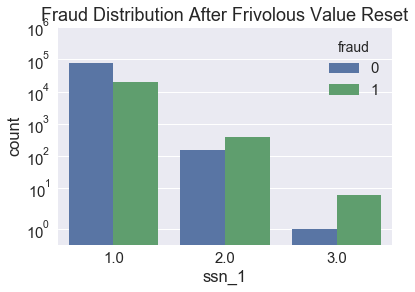

In [125]:
sns.set(font_scale=1.5)
ax = sns.countplot(x='ssn_1', hue = 'fraud',data = full)
ax.set(yscale='symlog')
ax.set_ylim([.1,1000000])
plt.title('Fraud Distribution After Frivolous Value Reset')
plt.show()

The last variable `firstname_lastname_ssn_dob_30` however, seem to be a even better variable

In [95]:
np.arange(0, 24,3)

array([ 0,  3,  6,  9, 12, 15, 18, 21])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


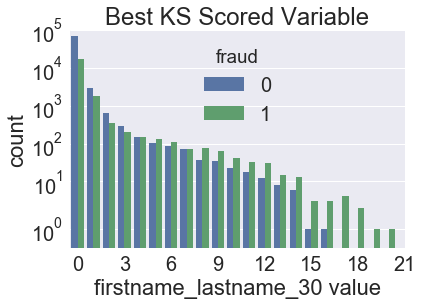

In [102]:
sns.set(font_scale=2)
ax = sns.countplot(x='firstname_lastname_30', hue = 'fraud',data = full)
ax.set(yscale='symlog')
ax.set_ylim([.1,100000])
plt.title('Best KS Scored Variable')
plt.xlabel('firstname_lastname_30 value')
plt.xticks([ 0,  3,  6,  9, 12, 15, 18, 21],[ 0,  3,  6,  9, 12, 15, 18, 21])
plt.show()

Likewise, we can take a look at the original dataset to see the quality of variables if we don't reset frivolous values. Looks like it does not separate goods and bads at all.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


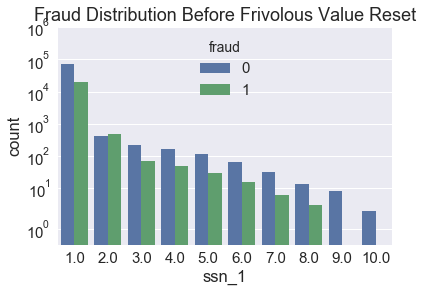

In [126]:
sns.set(font_scale=1.5)
ax = sns.countplot(x='ssn_1', hue = 'fraud',data = pd.concat([data,raw['fraud']],axis=1))
ax.set(yscale='symlog')
plt.title('Fraud Distribution Before Frivolous Value Reset')
ax.set_ylim([.1,1000000])
plt.show()

now we try to quantify how good these variables are separating `good` and `bad` records. Note that despite this section is called KS scores, KS test is actually operated on continuous distributions. We are just borrowing this idea of max difference in cumulative distribution.

In [23]:
goods = full[full['fraud'] == 0]
goods.shape

(74702, 109)

In [24]:
bads = full[full['fraud'] == 1]
bads.shape

(20164, 109)

In [25]:
numgoods = len(goods)
numbads = len(bads)

Here I 抄

In [82]:
max(dif)

0.03790710768894612

In [26]:
variable = 'ssn_1'
variable_max = int(full[variable].max())
x = pd.DataFrame(goods[variable].value_counts().sort_index())
x['index'] = x.index
y = pd.DataFrame(bads[variable].value_counts().sort_index())
y['index'] = y.index
dist1 = np.zeros(variable_max + 1)
dist2 = np.zeros(variable_max + 1)
dif = np.zeros(variable_max + 1)
for i in range(variable_max + 1):
    if i in x['index']:
        dist1[i] = x.loc[i,variable]
    if i in y['index']:
        dist2[i] = y.loc[i, variable]
dist1 = dist1 / numgoods
dist2 = dist2 / numbads
dif[0] = dist1[0] - dist2[0]
for i in range(1,variable_max + 1):
    dist1[i] = dist1[i-1] + dist1[i]
    dist2[i] = dist2[i-1] + dist2[i]
    dif[i] = dist1[i] - dist2[i]

print(dif.max() * 100)

1.7266489536144958


In [27]:
full.columns[9:]

Index(['ssn_1', 'ssn_3', 'ssn_7', 'ssn_15', 'ssn_30', 'zip5_1', 'zip5_3',
       'zip5_7', 'zip5_15', 'zip5_30', 'dob_1', 'dob_3', 'dob_7', 'dob_15',
       'dob_30', 'address_1', 'address_3', 'address_7', 'address_15',
       'address_30', 'homephone_1', 'homephone_3', 'homephone_7',
       'homephone_15', 'homephone_30', 'firstname_lastname_1',
       'firstname_lastname_3', 'firstname_lastname_7', 'firstname_lastname_15',
       'firstname_lastname_30', 'homephone_address_1', 'homephone_address_3',
       'homephone_address_7', 'homephone_address_15', 'homephone_address_30',
       'homephone_zip5_1', 'homephone_zip5_3', 'homephone_zip5_7',
       'homephone_zip5_15', 'homephone_zip5_30', 'address_zip5_1',
       'address_zip5_3', 'address_zip5_7', 'address_zip5_15',
       'address_zip5_30', 'ssn_address_1', 'ssn_address_3', 'ssn_address_7',
       'ssn_address_15', 'ssn_address_30', 'ssn_dob_1', 'ssn_dob_3',
       'ssn_dob_7', 'ssn_dob_15', 'ssn_dob_30', 'ssn_zip5_1', 'ssn_zip5_3

In [28]:
variables = np.array([])
scores = np.array([])
for v in full.columns[9:]:
    variable = v
    variable_max = int(full[variable].max())
    x = pd.DataFrame(goods[variable].value_counts().sort_index())
    x['index'] = x.index
    y = pd.DataFrame(bads[variable].value_counts().sort_index())
    y['index'] = y.index
    dist1 = np.zeros(variable_max + 1)
    dist2 = np.zeros(variable_max + 1)
    dif = np.zeros(variable_max + 1)
    for i in range(variable_max + 1):
        if i in x['index']:
            dist1[i] = x.loc[i,variable]
        if i in y['index']:
            dist2[i] = y.loc[i, variable]
    dist1 = dist1 / numgoods
    dist2 = dist2 / numbads
    dif[0] = dist1[0] - dist2[0]
    for i in range(1,variable_max + 1):
        dist1[i] = dist1[i-1] + dist1[i]
        dist2[i] = dist2[i-1] + dist2[i]
        dif[i] = dist1[i] - dist2[i]

    variables = np.hstack((variables,v))
    scores = np.hstack((scores,dif.max() * 100))

In [39]:
scores[np.argsort(-scores)]

array([9.61692247, 8.92942616, 8.60854596, 7.75831895, 5.55091565,
       4.47686378, 4.1427706 , 4.000315  , 3.97968712, 3.95379425,
       3.86714035, 3.84194841, 3.83455422, 3.82807699, 3.82807699,
       3.81778947, 3.81778947, 3.81416878, 3.81289333, 3.79071077,
       3.77401957, 3.65366263, 3.65308239, 3.60050146, 3.52297567,
       3.47950108, 3.46449667, 3.37665695, 3.36956841, 3.35855354,
       3.35688281, 3.35688281, 3.34540947, 3.34540947, 3.33911148,
       3.31784587, 3.31772982, 3.31069413, 3.23827015, 3.21411121,
       3.18912959, 3.1380769 , 3.12829951, 3.0774687 , 3.064235  ,
       3.064235  , 3.06377653, 3.0620426 , 3.04795515, 3.0466165 ,
       3.0466165 , 3.04013926, 3.03149605, 3.01323982, 2.9166144 ,
       2.8982157 , 2.76021502, 2.67084584, 2.65179906, 2.59922277,
       2.56148133, 2.55041999, 2.53569481, 2.53554199, 2.53435616,
       2.53435616, 2.5313732 , 2.52963928, 2.52641387, 2.52641387,
       2.52373657, 2.49760125, 2.41841509, 2.06723438, 1.85863

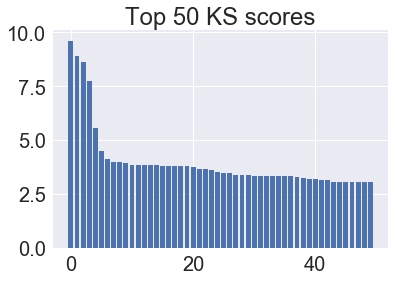

In [44]:
plt.bar(np.arange(50),scores[np.argsort(-scores)][:50])
plt.title('Top 50 KS scores')
plt.show()

In [31]:
variables[np.argsort(-scores)]

array(['firstname_lastname_30', 'firstname_lastname_15',
       'firstname_lastname_7', 'firstname_lastname_3',
       'firstname_lastname_1', 'ssn_dob_30', 'firstname_lastname_dob_30',
       'ssn_30', 'ssn_dob_15', 'firstname_lastname_homephone_30',
       'firstname_lastname_ssn_30', 'firstname_lastname_zip5_30',
       'firstname_lastname_address_30', 'address_30', 'address_zip5_30',
       'address_zip5_homephone_30', 'homephone_address_30',
       'ssn_address_30', 'ssn_zip5_30', 'firstname_lastname_ssn_dob_30',
       'homephone_zip5_30', 'ssn_dob_7', 'ssn_homephone_30',
       'firstname_lastname_dob_15', 'ssn_15', 'zip5_30',
       'firstname_lastname_homephone_15', 'firstname_lastname_ssn_15',
       'firstname_lastname_zip5_15', 'firstname_lastname_address_15',
       'address_zip5_15', 'address_15', 'homephone_address_15',
       'address_zip5_homephone_15', 'ssn_address_15', 'ssn_zip5_15',
       'homephone_zip5_15', 'firstname_lastname_ssn_dob_15',
       'firstname_lastn

In [46]:
v_50 = variables[np.argsort(-scores)][:50]

In [47]:
len(v_50)

50

In [48]:
full_50 = full.loc[:,v_50]

In [49]:
full_50.shape

(94866, 50)

In [50]:
full_50 = pd.concat([full_50,full['fraud']],axis=1)

In [51]:
full_50.head(5)

,firstname_lastname_30,firstname_lastname_15,firstname_lastname_7,firstname_lastname_3,firstname_lastname_1,ssn_dob_30,firstname_lastname_dob_30,ssn_30,ssn_dob_15,firstname_lastname_homephone_30,...,firstname_lastname_homephone_7,zip5_15,firstname_lastname_zip5_7,address_7,address_zip5_7,firstname_lastname_address_7,firstname_lastname_ssn_7,ssn_address_7,address_zip5_homephone_7,fraud
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


# 3. feature selection (forward) 

Since we shouldn't touch `out_of_date` part before final testing, we use only `in_date` as feature selection data

In [52]:
in_date = np.where((raw['date'].str[:2]!='11')&(raw['date'].str[:2]!='12'))[0]
in_date

array([    0,     1,     2, ..., 77847, 77848, 77849])

In [53]:
in_date_50 = full_50.iloc[in_date,:]

In [54]:
in_date_50.shape

(77850, 51)

Here I use `logistic regression` as the baseline model

In [55]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn import metrics

In [56]:
x_train, x_test, y_train, y_test = train_test_split(in_date_50.iloc[:,:50], in_date_50.iloc[:,50], 
                                                    test_size = 0.2,
                                                    random_state = 0)

In [57]:
x_train.shape

(62280, 50)

In [58]:
x_test.shape

(15570, 50)

In [59]:
m = LogisticRegression()
#m = PassiveAggressiveClassifier()

In [60]:
m.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
predicted = m.predict(x_test)

The reason I choose `recall` scores as our optmizing measurement/ objective is `FDR (fraud detection rate?)` , which is the ratio of frauds caught by the algorithm, and the definition of `recall` (`tp/(tp+fn)`)

In [62]:
recall_score(y_test, predicted) 

0.06145074437757365

In [63]:
sum(predicted[y_test==1])/len(y_test[y_test==1])

0.06145074437757365

In [64]:
report = metrics.classification_report(y_test, predicted)

In [65]:
print(report)

             precision    recall  f1-score   support

          0       0.81      0.99      0.89     12413
          1       0.64      0.06      0.11      3157

avg / total       0.77      0.80      0.73     15570



From above, we can tell the `recall` ratio for class `1` (fraud) is `9%`. To use a sentence to sum up the performance, you can choose 'it sucks' or the like...

One possible explanation for this performance is `imbalance` issue, which means the proportion of the two classes differs too much (can be, but shouldn't be so severver..)

The other, of course, is that the dataset is noisy, and the forged variables may not serve well as the predictors of frauds.

Anyway we perform forward selection here.

In [66]:
variables_needed = 25
variable_bucket = np.arange(0,50)
selected = np.array([])

for _ in range(variables_needed):     
    start = time.time()
    scores = np.array([])
    for v in variable_bucket:        
        selected_temp = np.hstack((selected,v))
        model = LogisticRegression() #reset model here
        model.fit(x_train.iloc[:,selected_temp], y_train)
        predicted = model.predict(x_test.iloc[:,selected_temp])
        recall = recall_score(y_test, predicted)
        scores = np.hstack((scores,recall))
    best_score = scores[np.argsort(-scores)][0]
    local_best = variable_bucket[np.argsort(-scores)][0]
    selected = np.hstack((selected,local_best))
    variable_bucket = np.delete(variable_bucket,np.where(variable_bucket==local_best))
    end = time.time()
    print('iter {} done, best recall {}, time elapsed {}'.format(str(_),
                                                                 str(round(best_score,3)),str(round(end-start,2))))

iter 0 done, best recall 0.077, time elapsed 2.99
iter 1 done, best recall 0.089, time elapsed 4.34
iter 2 done, best recall 0.089, time elapsed 5.42
iter 3 done, best recall 0.059, time elapsed 6.43
iter 4 done, best recall 0.064, time elapsed 7.51
iter 5 done, best recall 0.055, time elapsed 10.76
iter 6 done, best recall 0.056, time elapsed 13.19
iter 7 done, best recall 0.064, time elapsed 15.25
iter 8 done, best recall 0.064, time elapsed 15.6
iter 9 done, best recall 0.064, time elapsed 13.95
iter 10 done, best recall 0.064, time elapsed 20.6
iter 11 done, best recall 0.064, time elapsed 22.87
iter 12 done, best recall 0.064, time elapsed 18.48
iter 13 done, best recall 0.063, time elapsed 18.78
iter 14 done, best recall 0.063, time elapsed 20.46
iter 15 done, best recall 0.063, time elapsed 20.87
iter 16 done, best recall 0.063, time elapsed 22.38
iter 17 done, best recall 0.063, time elapsed 23.93
iter 18 done, best recall 0.063, time elapsed 26.58
iter 19 done, best recall 0.0

As we can see, `recall` actually declines as more variables are included in the model. Tree based models may be capable of dealing with this issue..,

In [53]:
selected 

array([ 4.,  3., 22., 42., 25., 40.,  0., 39., 24.,  5.,  7.,  8., 21.,
       13.,  2., 14., 18., 20., 45., 44., 35., 31., 28., 43.,  9.])

In [54]:
variable_bucket

array([ 1,  6, 10, 11, 12, 15, 16, 17, 19, 23, 26, 27, 29, 30, 32, 33, 34,
       36, 37, 38, 41, 46, 47, 48, 49])

In [55]:
set(selected)&set(variable_bucket)

set()

In [56]:
len(set(selected)^set(variable_bucket))

50

In [105]:
full_50.columns

Index(['firstname_lastname_30', 'firstname_lastname_15',
       'firstname_lastname_7', 'firstname_lastname_3', 'firstname_lastname_1',
       'ssn_dob_30', 'firstname_lastname_dob_30', 'ssn_30', 'ssn_dob_15',
       'firstname_lastname_homephone_30', 'firstname_lastname_ssn_30',
       'firstname_lastname_zip5_30', 'firstname_lastname_address_30',
       'address_30', 'address_zip5_30', 'address_zip5_homephone_30',
       'homephone_address_30', 'ssn_address_30', 'ssn_zip5_30',
       'firstname_lastname_ssn_dob_30', 'homephone_zip5_30', 'ssn_dob_7',
       'ssn_homephone_30', 'firstname_lastname_dob_15', 'ssn_15', 'zip5_30',
       'firstname_lastname_homephone_15', 'firstname_lastname_ssn_15',
       'firstname_lastname_zip5_15', 'firstname_lastname_address_15',
       'address_zip5_15', 'address_15', 'homephone_address_15',
       'address_zip5_homephone_15', 'ssn_address_15', 'ssn_zip5_15',
       'homephone_zip5_15', 'firstname_lastname_ssn_dob_15',
       'firstname_lastname_dob

In [107]:
full_25 = pd.concat([full_50.iloc[:,selected],full_50['fraud']],axis=1)

### The 25 variables are shown below

In [115]:
full_25.columns

26

In [116]:
pd.DataFrame(full_25.columns)

,0
0,firstname_lastname_1
1,firstname_lastname_3
2,ssn_homephone_30
3,zip5_15
4,zip5_30
5,ssn_homephone_15
6,firstname_lastname_30
7,ssn_7
8,ssn_15
9,ssn_dob_30


In [59]:
full_25.head()

,firstname_lastname_1,firstname_lastname_3,ssn_homephone_30,zip5_15,zip5_30,ssn_homephone_15,firstname_lastname_30,ssn_7,ssn_15,ssn_dob_30,...,ssn_zip5_30,homephone_zip5_30,address_zip5_7,address_7,ssn_zip5_15,address_15,firstname_lastname_zip5_15,firstname_lastname_zip5_7,firstname_lastname_homephone_30,fraud
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [60]:
out_of_date = full_25.iloc[np.where((raw['date'].str[:2]=='11')|(raw['date'].str[:2]=='12'))[0],:]

In [61]:
out_of_date.head()

,firstname_lastname_1,firstname_lastname_3,ssn_homephone_30,zip5_15,zip5_30,ssn_homephone_15,firstname_lastname_30,ssn_7,ssn_15,ssn_dob_30,...,ssn_zip5_30,homephone_zip5_30,address_zip5_7,address_7,ssn_zip5_15,address_15,firstname_lastname_zip5_15,firstname_lastname_zip5_7,firstname_lastname_homephone_30,fraud
77850,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
77851,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
77852,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
77853,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
77854,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [62]:
train_test = full_25.iloc[in_date,:]

In [63]:
train_test.shape

(77850, 26)

In [64]:
out_of_date.shape

(17016, 26)

In [65]:
train_test.to_csv('train_test.csv',index=False)
out_of_date.to_csv('out_of_date.csv',index=False)

# Optional: a pipeline

## 用中文博眼球一下。雖然這看起來是個classification problem，但是在老師的文件中做法是用linear regression預測fraud score，再選擇cut off value (用來分割是否為fraud的閥值)... 也就是說將這個問題視為regression problem可能是個比較好的做法(？

below is a demonstration of a reading and fitting data

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier  #this is linear SVM in sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [67]:
demo = pd.read_csv('train_test.csv')

In [68]:
demo.shape

(77850, 26)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(demo.iloc[:,:25], demo.iloc[:,25], 
                                                    test_size = 0.2,
                                                    random_state = 0)  #random_state is the random seed. change if needed

In [70]:
model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

In [71]:
model.fit(x_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [72]:
predicted = model.predict(x_test)

In [73]:
report = metrics.classification_report(y_test, predicted)

In [74]:
print(report)

             precision    recall  f1-score   support

          0       0.81      0.99      0.89     12413
          1       0.56      0.07      0.13      3157

avg / total       0.76      0.80      0.73     15570

